In [1]:
# import packages
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm


In [2]:
df = pd.read_csv("banking.csv")
print("Rows,Columns:",df.shape)

Rows,Columns: (41188, 21)


In [3]:
#no missing values picked up here
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [4]:
# But as we can see the string 'unknown' is indeed a missing value 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
# get all column names
string_column = list(df.columns[1:10])

# declare loop to identify all entries with string unknown
# returns p-dimensional array of boolean values, True representing presence on string
mask = np.column_stack([df[col].str.contains("^unknown", na=False) for col in string_column])

# declare new variable that DOES not contain TRUE entries in 
df_new = df.loc[~mask.any(axis=1)]

In [6]:
df_new.shape

(30488, 21)

In [7]:
print("Clean dataframe shape:",df_new.shape)

Clean dataframe shape: (30488, 21)


# Data Visualization

It is always good practice to visualize your data to understand the data in order to fit the model using the best predictors. 

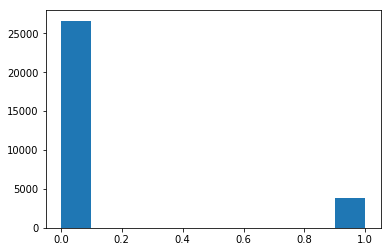

In [8]:
plt.hist(df_new["y"])
plt.show()

In [9]:
y_groupby_edu = df_new.groupby(['y', 'education' ])['y'].count()

In [10]:
print(y_groupby_edu.unstack())

education  basic.4y  basic.6y  basic.9y  high.school  illiterate  \
y                                                                  
0              2054      1253      3896         6765           8   
1               326       136       380          934           3   

education  professional.course  university.degree  
y                                                  
0                         3783               8870  
1                          538               1542  


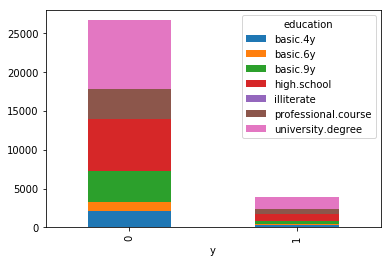

In [11]:
y_groupby_edu.unstack().plot.bar(stacked=True)

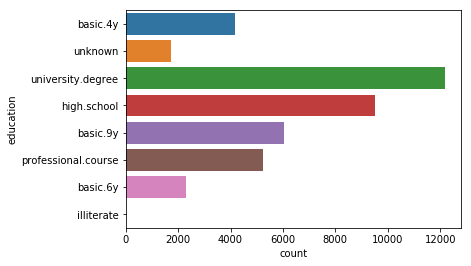

In [12]:
sb.countplot(y="education",data = df)
plt.show()

In [13]:
y_groupby_marital = df_new.groupby(['y', 'marital' ])['y'].count()

In [14]:
print(y_groupby_marital.unstack())

marital  divorced  married  single
y                                 
0            3143    15436    8050
1             410     2056    1393


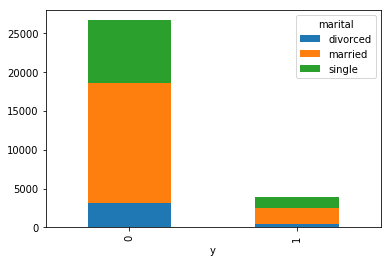

In [15]:
y_groupby_marital.unstack().plot.bar(stacked=True)

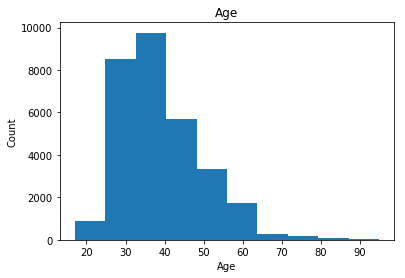

In [16]:

plt.hist(df_new["age"])
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Count")

fig = plt.gcf()

In [17]:
y_groupby_age = df_new.groupby(['y', 'age' ])['y'].count()

In [18]:
age_bins = pd.cut(df_new["age"], bins=[15, 25, 35, 45,55,65,75,85,95], include_lowest=True)
df_new["age_bins"] = age_bins

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
y_groupby_age = df_new.groupby(['y', 'age_bins' ])['y'].count()

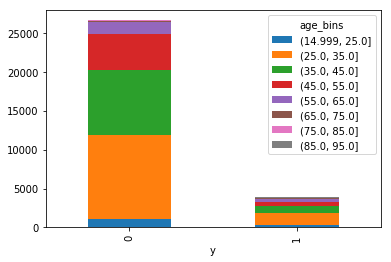

In [20]:
y_groupby_age.unstack().plot.bar(stacked=True)

In [21]:
y_groupby_housing = df_new.groupby(['y','housing'])['y'].count()

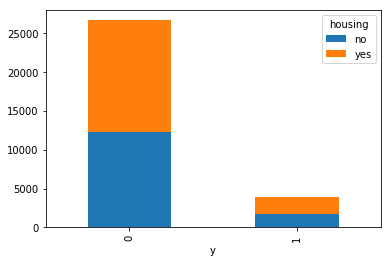

In [22]:
y_groupby_housing.unstack().plot.bar(stacked=True)

Housing vs Y, This does not seem to offer an differentiation, may not be important. 

In [23]:
y_groupby_default = df_new.groupby(['y','default'])['y'].count()

In [24]:
y_groupby_loan = df_new.groupby(['y','loan'])['y'].count()

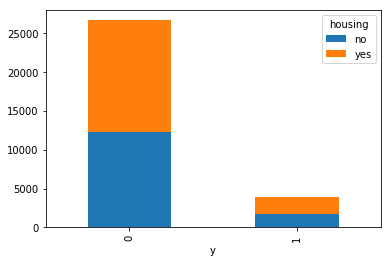

In [25]:
y_groupby_housing.unstack().plot.bar(stacked=True)

In [26]:
y_groupby_pdays = df_new.groupby(['y','pdays'])['y'].count()

In [27]:
y_groupby_pdays

y  pdays
0  0            4
   1           14
   2           22
   3          122
   4           49
   5           16
   6          108
   7           16
   8            5
   9           26
   10          15
   11          12
   12          28
   13           7
   14           7
   15           6
   16           3
   17           5
   18           3
   19           2
   22           1
   999      26158
1  0           10
   1            7
   2           31
   3          259
   4           53
   5           27
   6          255
   7           34
   8            8
   9           27
   10          25
   11          13
   12          22
   13          26
   14          10
   15          16
   16           5
   17           1
   18           2
   19           1
   21           2
   22           2
   25           1
   26           1
   27           1
   999       3020
Name: y, dtype: int64

In [28]:
# Lets change this to previously_contacted (values: 0(no) or 1(yes))

#df_new["pdays"] = df_new['pdays'].replace([999], '0')
#df_new["pdays"] = df_new['pdays'].replace(range(3), '1')
#df_new["pdays"] = df_new['pdays'].replace(range(7,28), '1')
#df_new["pdays"] = df_new['pdays'].replace(range(3,7), '2')


In [29]:
y_groupby_pdays = df_new.groupby(['y','pdays'])['y'].count()

In [30]:
y_groupby_pdays

y  pdays
0  0            4
   1           14
   2           22
   3          122
   4           49
   5           16
   6          108
   7           16
   8            5
   9           26
   10          15
   11          12
   12          28
   13           7
   14           7
   15           6
   16           3
   17           5
   18           3
   19           2
   22           1
   999      26158
1  0           10
   1            7
   2           31
   3          259
   4           53
   5           27
   6          255
   7           34
   8            8
   9           27
   10          25
   11          13
   12          22
   13          26
   14          10
   15          16
   16           5
   17           1
   18           2
   19           1
   21           2
   22           2
   25           1
   26           1
   27           1
   999       3020
Name: y, dtype: int64

Again, this variable does not seem to offer much discriminatory information. 

# Encoding 

- Label Encoding

In [31]:
df_label = df_new.copy()

In [32]:
df_label

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,age_bins
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,"(25.0, 35.0]"
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,"(35.0, 45.0]"
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,"(45.0, 55.0]"
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0,"(25.0, 35.0]"
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0,"(35.0, 45.0]"
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,"(35.0, 45.0]"
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1,"(35.0, 45.0]"
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0,"(25.0, 35.0]"
10,34,housemaid,single,university.degree,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0,"(25.0, 35.0]"
11,41,management,married,university.degree,no,yes,no,cellular,aug,thu,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0,"(35.0, 45.0]"


In [33]:
df_label["job"] = df_label["job"].astype('category')
df_label["job_cat"] = df_label["job"].cat.codes

df_label["marital"] = df_label["marital"].astype('category')
df_label["marital_cat"] = df_label["marital"].cat.codes

df_label["education"] = df_label["education"].astype('category')
df_label["education_cat"] = df_label["education"].cat.codes

df_label["default"] = df_label["default"].astype('category')
df_label["default_cat"] = df_label["default"].cat.codes

df_label["housing"] = df_label["housing"].astype('category')
df_label["housing_cat"] = df_label["housing"].cat.codes

df_label["loan"] = df_label["loan"].astype('category')
df_label["loan_cat"] = df_label["loan"].cat.codes


df_label["contact"] = df_label["contact"].astype('category')
df_label["contact_cat"] = df_label["contact"].cat.codes

df_label["month"] = df_label["month"].astype('category')
df_label["month_cat"] = df_label["month"].cat.codes

df_label["day_of_week"] = df_label["day_of_week"].astype('category')
df_label["day_of_week_cat"] = df_label["day_of_week"].cat.codes

df_label["poutcome"] = df_label["poutcome"].astype('category')
df_label["poutcome_cat"] = df_label["poutcome"].cat.codes

In [34]:
df_label = df_label.drop(string_column,axis=1)

In [35]:
df_label = df_label.drop(["age_bins"],axis=1)

In [36]:
y = df_label["y"] 

In [37]:
df_label = df_label.drop(["y"],axis=1)

In [38]:
df_label

,age,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,...,job_cat,marital_cat,education_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,day_of_week_cat,poutcome_cat
2,28,339,3,6,2,success,-1.7,94.055,-39.8,0.729,...,4,2,6,0,1,0,0,4,2,2
3,39,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,...,7,1,3,0,0,0,0,0,0,1
4,55,137,1,3,1,success,-2.9,92.201,-31.4,0.869,...,5,1,0,0,1,0,0,1,0,2
5,30,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,...,4,0,0,0,1,0,0,3,3,1
6,37,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,...,1,1,0,0,1,0,0,6,2,1
7,39,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,...,1,0,2,0,1,0,0,6,0,1
8,36,174,1,3,1,success,-2.9,92.963,-40.8,1.266,...,0,1,6,0,0,0,0,4,1,2
9,27,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,...,1,2,0,0,1,0,0,0,2,0
10,34,62,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,...,3,2,6,0,0,0,1,6,0,1
11,41,789,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,...,4,1,6,0,1,0,0,1,2,1


In [39]:
df_label = df_label.drop(["poutcome"],axis = 1)

In [40]:
df_label

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_cat,marital_cat,education_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,day_of_week_cat,poutcome_cat
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,4,2,6,0,1,0,0,4,2,2
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,7,1,3,0,0,0,0,0,0,1
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,5,1,0,0,1,0,0,1,0,2
5,30,68,8,999,0,1.4,93.918,-42.7,4.961,5228.1,4,0,0,0,1,0,0,3,3,1
6,37,204,1,999,0,-1.8,92.893,-46.2,1.327,5099.1,1,1,0,0,1,0,0,6,2,1
7,39,191,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,1,0,2,0,1,0,0,6,0,1
8,36,174,1,3,1,-2.9,92.963,-40.8,1.266,5076.2,0,1,6,0,0,0,0,4,1,2
9,27,191,2,999,1,-1.8,93.075,-47.1,1.410,5099.1,1,2,0,0,1,0,0,0,2,0
10,34,62,2,999,0,1.1,93.994,-36.4,4.864,5191.0,3,2,6,0,0,0,1,6,0,1
11,41,789,1,999,0,1.4,93.444,-36.1,4.964,5228.1,4,1,6,0,1,0,0,1,2,1


In [41]:
df_onehot = df_new.copy()

In [42]:
df_onehot = pd.get_dummies(df_onehot, columns=string_column)

In [43]:
df_onehot = df_onehot.drop(["y","age_bins"],axis = 1)

In [44]:
df_onehot = pd.get_dummies(df_onehot, columns=['poutcome'])

In [45]:
df_onehot

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
5,30,68,8,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,1,0,0,1,0
6,37,204,1,999,0,-1.8,92.893,-46.2,1.327,5099.1,...,0,0,0,0,1,0,0,0,1,0
7,39,191,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
8,36,174,1,3,1,-2.9,92.963,-40.8,1.266,5076.2,...,0,0,0,1,0,0,0,0,0,1
9,27,191,2,999,1,-1.8,93.075,-47.1,1.410,5099.1,...,0,0,0,0,1,0,0,1,0,0
10,34,62,2,999,0,1.1,93.994,-36.4,4.864,5191.0,...,0,0,1,0,0,0,0,0,1,0
11,41,789,1,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,0,0,1,0,0,0,1,0


## Splitting each DataFrame

In [46]:
x_train_label,x_test_label,y_train_label,y_test_label = train_test_split(df_label,y,test_size = 0.3)

In [47]:
x_train_onehot,x_test_onehot,y_train_onehot,y_test_onehot = train_test_split(df_onehot,y,test_size = 0.3)

# Fitting the model 

- Using label encoder df first

In [48]:
# Simplest Classifier
classifier = LogisticRegression(solver = 'sag')
model_label = classifier.fit(x_train_label,y_train_label) 
y_pred_train_label = classifier.predict(x_train_label)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [49]:
from sklearn.metrics import confusion_matrix 
confuse = confusion_matrix(y_train_label,y_pred_train_label)
print(confuse)

print("\nTN =",confuse[0][0])
print("FN =",confuse[0][1])
print("FP =",confuse[1][0])
print("TP =",confuse[1][1])

[[18243   406]
 [ 1803   889]]

TN = 18243
FN = 406
FP = 1803
TP = 889


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_train_label,y_pred_train_label))

             precision    recall  f1-score   support

          0       0.91      0.98      0.94     18649
          1       0.69      0.33      0.45      2692

avg / total       0.88      0.90      0.88     21341



In [51]:
# Lets try a logistic model with Statsmodel 
#x_train_constant = sm.add_constant(x_train_label)

#workaround for error for 'dead' summary; basically statsmodels glitch
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit = sm.Logit(exog = x_train_label, endog = y_train_label)
model = logit.fit()
model.summary()


         Current function value: 0.232872
         Iterations: 35


/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                21341
Model:                          Logit   Df Residuals:                    21321
Method:                           MLE   Df Model:                           19
Date:                Fri, 04 May 2018   Pseudo R-squ.:                  0.3855
Time:                        08:37:24   Log-Likelihood:                -4969.7
converged:                      False   LL-Null:                       -8088.0
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0046      0.003      1.825      0.068      -0.000       0.010
duration            0.0045   9.88e-05     45.415      0.000       0.004       0.005
campaign           -0.0413      0.016     -2.582      0.010      -0.073      -0.010
pdays              -0.0009      0.000     -4.475      0.000      -0.001      -0.001
previous           -0.0517      0.072     -0.722      0.470      -0.192       0.089
emp_var_rate       -0.9977      0.080    -12.425      0.000      -1.155      -0.840
cons_price_idx      0.7256      0.039     18.597      0.000       0.649       0.802
cons_conf_idx       0.0084      0.006      1.469      0.142      -0.003       0.020
euribor3m           0.7401      0.093      7.932      0.000       0.557       0.923
nr_employed        -0.0143      0.001    -18.627      0.000      -0.016      -0.013
job_cat             0.0133      0.007      1.832      0.067      -0.001       0.028
marital_cat         0.0862      0.047      1.817      0.069      -0.007       0.179
education_cat       0.0611      0.014      4.458      0.000       0.034       0.088
default_cat       -25.8239   1.83e+06  -1.41e-05      1.000   -3.59e+06    3.59e+06
housing_cat        -0.0308      0.053     -0.579      0.563      -0.135       0.073
loan_cat           -0.0543      0.074     -0.736      0.462      -0.199       0.090
contact_cat        -0.6725      0.080     -8.411      0.000      -0.829      -0.516
month_cat          -0.1116      0.011    -10.355      0.000      -0.133      -0.090
day_of_week_cat     0.0670      0.019      3.487      0.000       0.029       0.105
poutcome_cat        0.4813      0.099      4.882      0.000       0.288       0.674
===================================================================================
"""

Following variables are insignificant at 10%

- Loan_cat
- Housing_cat
- default

These variables, as we hypothesized during data exploration, seemed to be unhelpful in discriminating between our classes. Lets drop them and see if we notice an improvement. Before that lets see if our base model results are going to be different using the one-hot encoding df.  

In [52]:
# Simplest Classifier with onehot encoded data

model_label = classifier.fit(x_train_onehot,y_train_onehot) 
y_pred_train_onehot = classifier.predict(x_train_onehot)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [53]:
from sklearn.metrics import confusion_matrix 
confuse = confusion_matrix(y_train_onehot,y_pred_train_onehot)
print(confuse)

print("\nTN =",confuse[0][0])
print("FN =",confuse[0][1])
print("FP =",confuse[1][0])
print("TP =",confuse[1][1])

[[18266   412]
 [ 1827   836]]

TN = 18266
FN = 412
FP = 1827
TP = 836


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_train_label,y_pred_train_label))

             precision    recall  f1-score   support

          0       0.91      0.98      0.94     18649
          1       0.69      0.33      0.45      2692

avg / total       0.88      0.90      0.88     21341



Since both are virtually the same in performance, I go ahead with the model with less variables aka label encoding. 

## Feature Engineering 

In [55]:
# Dropping loan, housing and default to see if error improves 

df_label_eng = df_label.drop(["housing_cat","loan_cat","default_cat"],axis = 1)
x_train_label_1,x_test_label_1,y_train_label_1,y_test_label_1 = train_test_split(df_label_eng,y,test_size = 0.3)

In [56]:
model_label_1 = classifier.fit(x_train_label_1,y_train_label_1) 
y_pred_train_label_1 = classifier.predict(x_train_label_1)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [57]:
from sklearn.metrics import confusion_matrix 
confuse = confusion_matrix(y_train_label_1,y_pred_train_label_1)
print(confuse)

print("\nTN =",confuse[0][0])
print("FN =",confuse[0][1])
print("FP =",confuse[1][0])
print("TP =",confuse[1][1])

[[18230   425]
 [ 1777   909]]

TN = 18230
FN = 425
FP = 1777
TP = 909


In [58]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit = sm.Logit(exog = x_train_label_1, endog = y_train_label_1)
model = logit.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.231447
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                21341
Model:                          Logit   Df Residuals:                    21324
Method:                           MLE   Df Model:                           16
Date:                Fri, 04 May 2018   Pseudo R-squ.:                  0.3884
Time:                        08:37:28   Log-Likelihood:                -4939.3
converged:                       True   LL-Null:                       -8076.3
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0033      0.003      1.300      0.194      -0.002       0.008
duration            0.0045   9.93e-05     45.337      0.000       0.004       0.005
campaign           -0.0322      0.016     -2.048      0.041      -0.063      -0.001
pdays              -0.0010      0.000     -4.895      0.000      -0.001      -0.001
previous           -0.0726      0.070     -1.042      0.298      -0.209       0.064
emp_var_rate       -0.8960      0.082    -10.967      0.000      -1.056      -0.736
cons_price_idx      0.6878      0.039     17.492      0.000       0.611       0.765
cons_conf_idx       0.0135      0.006      2.327      0.020       0.002       0.025
euribor3m           0.6183      0.095      6.525      0.000       0.433       0.804
nr_employed        -0.0135      0.001    -17.374      0.000      -0.015      -0.012
job_cat             0.0076      0.007      1.037      0.300      -0.007       0.022
marital_cat         0.0837      0.048      1.759      0.079      -0.010       0.177
education_cat       0.0677      0.014      4.961      0.000       0.041       0.094
contact_cat        -0.6849      0.080     -8.571      0.000      -0.842      -0.528
month_cat          -0.1024      0.011     -9.504      0.000      -0.124      -0.081
day_of_week_cat     0.0719      0.019      3.742      0.000       0.034       0.109
poutcome_cat        0.5180      0.096      5.419      0.000       0.331       0.705
===================================================================================
"""

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_train_label_1,y_pred_train_label_1))

             precision    recall  f1-score   support

          0       0.91      0.98      0.94     18655
          1       0.68      0.34      0.45      2686

avg / total       0.88      0.90      0.88     21341



In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_label_1.values, i) for i in range(x_train_label_1.shape[1])]
vif["features"] = x_train_label_1.columns
vif

,VIF Factor,features
0,19.257473,age
1,1.995293,duration
2,1.919164,campaign
3,135.099632,pdays
4,5.688747,previous
5,37.396958,emp_var_rate
6,33548.374356,cons_price_idx
7,121.830396,cons_conf_idx
8,280.894442,euribor3m
9,38536.318749,nr_employed


Hmm... nr emolyed and cons_price_idx are HIGHLY correlated with other variables. This is understandable emp.var.rate and cons.price.idx are very related in economic terms. Lets drop them. 

In [61]:
df_label_eng = df_label_eng.drop(["cons_price_idx","nr_employed"],axis = 1)

In [62]:
x_train_label_2,x_test_label_2,y_train_label_2,y_test_label_2 = train_test_split(df_label_eng,y,test_size = 0.3)

In [63]:
model_label_2 = classifier.fit(x_train_label_2,y_train_label_2) 
y_pred_train_label_2 = classifier.predict(x_train_label_2)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [64]:
x_train_label_2

,age,duration,campaign,pdays,previous,emp_var_rate,cons_conf_idx,euribor3m,job_cat,marital_cat,education_cat,contact_cat,month_cat,day_of_week_cat,poutcome_cat
20416,34,82,1,999,0,1.4,-42.7,4.962,0,1,5,0,3,3,1
20351,32,107,2,999,1,-2.9,-31.4,0.881,9,2,5,1,1,0,0
18958,44,869,1,999,0,1.4,-42.7,4.962,0,1,3,0,3,4,1
4562,33,187,2,999,0,-0.1,-42.0,4.076,10,2,6,0,7,2,1
5669,37,73,4,999,1,-0.1,-42.0,4.021,0,1,5,0,7,0,0
8967,34,159,1,999,1,-1.8,-46.2,1.313,0,1,6,0,6,0,0
16060,41,142,1,4,2,-2.9,-31.4,0.881,7,2,6,0,1,0,2
19894,26,16,3,999,0,-1.8,-46.2,1.291,6,1,0,1,6,3,1
10914,38,90,1,999,0,-3.4,-26.9,0.740,0,1,6,0,8,4,1
30268,36,218,2,999,0,1.1,-36.4,4.855,4,2,1,1,6,2,1


In [65]:
from sklearn.metrics import confusion_matrix 
confuse = confusion_matrix(y_train_label_2,y_pred_train_label_2)
print(confuse)

print("\nTN =",confuse[0][0])
print("FN =",confuse[0][1])
print("FP =",confuse[1][0])
print("TP =",confuse[1][1])

[[18148   473]
 [ 1814   906]]

TN = 18148
FN = 473
FP = 1814
TP = 906


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_train_label_2,y_pred_train_label_2))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94     18621
          1       0.66      0.33      0.44      2720

avg / total       0.88      0.89      0.88     21341



In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_label_2.values, i) for i in range(x_train_label_2.shape[1])]
vif["features"] = x_train_label_2.columns
vif

,VIF Factor,features
0,17.619840,age
1,1.985506,duration
2,1.907455,campaign
3,78.343234,pdays
4,3.046069,previous
5,15.118737,emp_var_rate
6,65.100469,cons_conf_idx
7,73.200859,euribor3m
8,2.064343,job_cat
9,5.439461,marital_cat


Okay, so we have manager to remove some variables with only a minor improvement in accuracy, let us know try ridge classifier and see if penalization can improve further. 

In [81]:
#center variables
from sklearn import preprocessing
x_train_label_2.info()

continous_var_list = list(x_train_label_2.columns[:8])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21341 entries, 20416 to 30020
Data columns (total 15 columns):
age                21341 non-null int64
duration           21341 non-null int64
campaign           21341 non-null int64
pdays              21341 non-null int64
previous           21341 non-null int64
emp_var_rate       21341 non-null float64
cons_conf_idx      21341 non-null float64
euribor3m          21341 non-null float64
job_cat            21341 non-null int8
marital_cat        21341 non-null int8
education_cat      21341 non-null int8
contact_cat        21341 non-null int8
month_cat          21341 non-null int8
day_of_week_cat    21341 non-null int8
poutcome_cat       21341 non-null int8
dtypes: float64(3), int64(5), int8(7)
memory usage: 1.6 MB


## Ridge Regression

Rememeber, we must fist standardize (center) our variables first to limit an assymetric skew on the data

In [82]:
# scale(center) training data
for i in continous_var_list:
    x_train_label_2[i]=preprocessing.scale(x_train_label_2[i].astype('float64'))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [85]:
## scale(center) test data
for i in continous_var_list:
    x_test_label_2[i]=preprocessing.scale(x_test_label_2[i].astype('float64'))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
from sklearn.linear_model import RidgeClassifier as rc


alphas = [0.05,0.1,0.2,0.5,1,2]
for i in alphas:
    rc = rc(i)
    rc.fit(x_train_label_2,y_train_label_2)
    predictions_rc = rc.predict(x_train_label_2)
    print("Alpha: ",i)
    print(classification_report(y_train_label_2,predictions_rc))


Alpha:  0.05
             precision    recall  f1-score   support

          0       0.91      0.98      0.94     18621
          1       0.67      0.30      0.41      2720

avg / total       0.87      0.89      0.87     21341



TypeError: 'RidgeClassifier' object is not callable

In [92]:
for i in continous_var_list:
    df_label_eng[i]=preprocessing.scale(df_label_eng[i].astype('float64'))

In [108]:
from sklearn.linear_model import RidgeClassifierCV as rcv

model=rcv(cv=10,alphas=alphas).fit(df_label_eng,y)
predictions_rcv = model.predict(df_label_eng)

In [117]:
dict(zip(df_label_eng.columns, model.coef_))

{'age': array([ 0.01451447,  0.24947188,  0.00351325, -0.08527524,  0.03497924,
         0.01050217,  0.06987594, -0.19688017,  0.00169084,  0.01655901,
         0.0091679 , -0.03372908, -0.00862414,  0.00856634,  0.18712931])}

In [113]:
print(classification_report(y,predictions_rcv))

             precision    recall  f1-score   support

          0       0.91      0.98      0.94     26629
          1       0.67      0.31      0.42      3859

avg / total       0.88      0.89      0.88     30488



## Lasso regression for Classification

There is no specific package for lasso for classication, one option is to use the logistic regression but enable l1 penalization. Remember, l1 penalization limits the sum of the absolute value of our coefficients. In doing so, can zero out some coefficients due the linear regression solution being tangential to the diamond shape of the constraint (abs(B1)+abs(B2). Here the equivalent to the alpha is the parameter C. As you will notice, in this construct, a smaller C value will cause more penalization. In regular lasso (and ridge) it was a large lambda which caused the increased penalization. The overall impact, however, is the same. 

In [130]:
C = [10,5,2, 1, .1, .001]
for c in C:
    Logistic_lasso = LogisticRegression(penalty = "l1",C=c)
    lasso_model = Logistic_lasso.fit(x_train_label_2,y_train_label_2)
    predictions_lasso = lasso_model.predict(x_train_label_2)
    print("C:",c)
    print("\n")
    print("Coefficients: ",lasso_model.coef_)
    print("\n")
    print("Classification Report")
    print(classification_report(y_train_label_2,predictions_lasso))

C: 10


Coefficients:  [[ 0.07157234  1.14232588 -0.12108623 -0.18575575  0.06143049  0.14196027
   0.26841248 -1.23148419  0.02105979  0.1319558   0.07244189 -0.29119632
  -0.03982259  0.05667841  0.54817864]]


Classification Report
             precision    recall  f1-score   support

          0       0.92      0.97      0.94     18621
          1       0.66      0.39      0.49      2720

avg / total       0.88      0.90      0.89     21341

C: 5


Coefficients:  [[ 0.07140247  1.14212629 -0.12079327 -0.18674664  0.06079352  0.13964547
   0.26810021 -1.2289832   0.02100748  0.13159617  0.07233965 -0.29073473
  -0.03990333  0.0565806   0.54547335]]


Classification Report
             precision    recall  f1-score   support

          0       0.92      0.97      0.94     18621
          1       0.66      0.39      0.49      2720

avg / total       0.88      0.90      0.89     21341

C: 2


Coefficients:  [[ 0.07108962  1.14180164 -0.12025438 -0.18692259  0.06101415  0.13408784
   0.